In [ ]:
import glob, csv, time


top = 49.3457868 # north lat
left = -124.7844079 # west long
right = -66.9513812 # east long
bottom =  24.7433195 # south lat
n=0
US_Final = []

 


for files in glob.glob("2022/*.csv"):
    US = []
    n+=1
    
    if n>=8000 and n<9000:
        file = csv.reader(open(files,'r'))
        m=0
        for r in file:
            m+=1
            if m>1:
                if bottom <= int(float(r[3])) <= top and left <= int(float(r[4])) <= right:
                    #US.append((r[0]))  
                    US_Final.append(r)  
                    

with open("US_Data5.csv", 'w') as csvfile:    
    csvwriter = csv.writer(csvfile) 
    csvwriter.writerows(US_Final)

In [ ]:
import glob, csv, time
from shapely.geometry import Polygon, Point
n=0
US=[]
polygon = Polygon([(48.55722036991696,-124.77539241313934),(47.141784234243886,-68.17382991313934),(24.50297838543698,-81.00586116313934),(34.139846501570005,-120.64453303813934),(48.55722036991696,-124.77539241313934)])
for files in glob.glob('2022/*csv'):
    
    n+=1
    if n>7374:
        with open(files,'r') as f:
            data = csv.reader(f)
            for i in data:
                point = Point(i[3],i[4])
                if polygon.contains(point):
                    US.append(i)

with open("US_Data.csv", 'w') as csvfile:    
    csvwriter = csv.writer(csvfile) 
    csvwriter.writerows(US_Final)

In [5]:
import csv
with open('US_Data4.csv') as d:
    data = csv.reader(d)
    n=0
    for i in data:
        if len(i)>1:
            if 'NY US' in i[6]:
                with open('NY.csv','a') as f:
                    w = csv.writer(f)
                    w.writerow(i)
        n+=1
f.close()


In [22]:
import csv
with open('US_Data.csv') as d:
    data = csv.reader(d)
    n=0
    for i in data:
        if len(i)>1:
            if 'VT US' in i[6]:
                with open('Vermont.csv','a') as f:
                    w = csv.writer(f)
                    w.writerow(i)
        n+=1
f.close()

In [15]:
import csv
n=0
stations={}
with open('NY.csv','r') as f:
    data= csv.reader(f)
    for i in data:
        if len(i)>1:
            if i[6] not in stations:
                stations[i[0]]=i[6]
        n+=1
print(len(stations))
n/2

39


500981.5

In [16]:
from tabulate import tabulate
x = []
for i in stations:
    x.append([i,stations[i]])
print(tabulate(x))

-----------  -----------------------------------------------
STATION      NAME
72055399999  PORT AUTH DOWNTN MANHATTAN WALL ST HEL, NY US
72498894704  DANSVILLE MUNICIPAL AIRPORT, NY US
72501454780  MONTAUK AIRPORT, NY US
72501504789  MONTGOMERY ORANGE CO AIRPORT, NY US
72501654790  SHIRLEY BROOKHAVEN AIRPORT, NY US
72503014732  LAGUARDIA AIRPORT, NY US
72503614757  POUGHKEEPSIE AIRPORT, NY US
72503794745  WESTCHESTER CO AIRPORT, NY US
72503814714  STEWART FIELD, NY US
72505004781  ISLIP LI MACARTHUR AIRPORT, NY US
72505394728  NY CITY CENTRAL PARK, NY US
72514554746  MONTICELLO SULLIVAN, NY US
72514654773  FULTON OSWEGO CO AIRPORT, NY US
72515004725  BINGHAMTON GREATER AP, NY US
72515594761  ITHACA TOMPKINS CNTY, NY US
72515614748  ELMIRA CORNING REGIONAL AIRPORT, NY US
72515754757  WELLSVILLE MUNICIPAL AIRPORT, NY US
72518014735  ALBANY INTERNATIONAL AIRPORT, NY US
72518699999  OGDENSBURG INTERNATIONAL, NY US
72519014771  SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US
72519454778  PEN

In [2]:
import csv
LatLong={}
Location={}
with open('NY.csv','r') as f:
    n=0
    data= csv.reader(f)
    for i in data:
        if len(i)>1:
            if i[0] not in LatLong:
                LatLong[i[0]]=[i[3],i[4]]
            elif LatLong[i[0]]!=[i[3],i[4]]:
                Location[i[0]]=[LatLong[i[0]],[i[3],i[4]]]
            n+=1
Location

{}

In [3]:
def temperature(file):
    with open(file) as f:
        temp={}
        n=0
        data= csv.reader(f)
        for i in data:
            if len(i)>1 and 'TMP' not in i[13][:4] and -30<int(i[13][:4])<50:
                if i[0] not in temp:
                    n=1
                    temp[i[0]]=int(i[13][:4])
                    
                else:
                    n+=1
                    temp[i[0]]=((temp[i[0]]*(n-1))+int(i[13][:4]))/n

    return temp

In [4]:
temp=temperature('NY.csv')

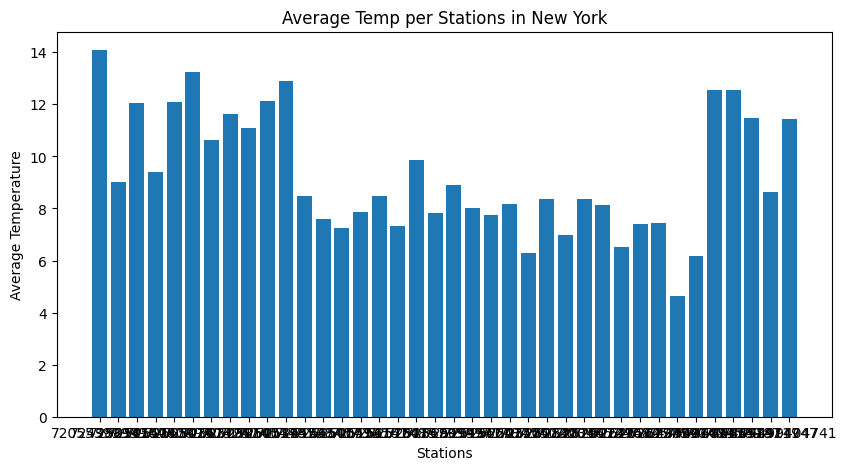

In [5]:
import matplotlib.pyplot as plt 

stat = list(temp.keys())
values = list(temp.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(stat, values)
 
plt.xlabel("Stations")
plt.ylabel("Average Temperature")
plt.title("Average Temp per Stations in New York")
plt.show()

In [11]:
import folium
m =folium.Map(location=[30,-98],zoom_start=6)
for i in temp:
    if temp[i]<10:
        folium.Marker(LatLong[i], popup=[stations[i],temp[i]], icon=folium.Icon(color='green')).add_to(m)
    if temp[i]>=10 and temp[i]<15:
        folium.Marker(LatLong[i], popup=[stations[i],temp[i]], icon=folium.Icon(color='pink')).add_to(m)
    if temp[i]>=15:
        folium.Marker(LatLong[i], popup=[stations[i],temp[i]], icon=folium.Icon(color='red')).add_to(m)
m
#m.save('NYMap.html')

In [91]:
def monthwise_temp(file):
    mt={}
    with open(file) as f:
        n=0
        data= csv.reader(f)
        for i in data:
            if len(i)>1 and 'TMP' not in i[13][:4] and -30<int(i[13][:4])<50:
                for j in range(1,13):
                    if int(i[1][5:7])==j:
                        if i[0]+'_'+str(j) not in mt:
                            n=1
                            mt[i[0]+'_'+str(j)]=int(i[13][:4])
                        else:
                            n+=1
                            mt[i[0]+'_'+str(j)]=((mt[i[0]+'_'+str(j)]*(n-1))+int(i[13][:4]))/n
    return mt

In [92]:
monthly_time = monthwise_temp('NY.csv')
len(monthly_time)

451

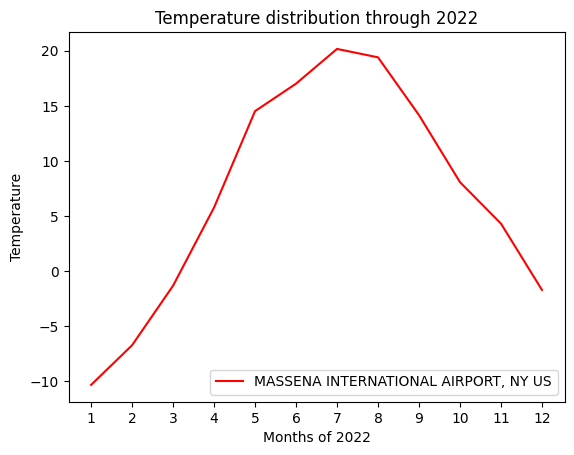

In [95]:
import matplotlib.pyplot as plt
n=0
x=[]
y=[]
for i in monthly_time:
    if i.split('_')[0]=='72622394725':
        x.append(i.split('_')[1])
        y.append(monthly_time[i])
    n+=1
plt.plot(x,y,label=stations['72622394725'],color='red')
plt.xlabel("Months of 2022") 
plt.ylabel("Temperature") 
plt.title('Temperature distribution through 2022')
plt.legend()
plt.show()

In [14]:
x=0
for i in temp:
    x+=temp[i]
print('Avg New York Temp: ',x/39)

Avg New York Temp:  9.044218082020976
